## Dataset
The dataset is composed of 70,000 digits written by 700 participants. Each participant wrote each digit (from 0 to 9) twenty times (ten times only used in our database – the other ten times may be used later in writer verification research). To ensure including different writing styles, the database was gathered from different institutions: Colleges of Engineering and Law, School of Medicine, the Open University (whose students span a wide range of ages), a high school, and a governmental institution. Forms were scanned with 300 dpi resolution then digits are automatically extracted, categorized, and bounded by bounding boxes. We adjusted the scanner to produce binary images directly; so we did not need to binarize the resulting images. Some noisy and corrupted digit images were edited manually. The database is partitioned into two sets: a training set (60,000 digits – 6000 images per class) and a test set (10,000 digits – 1000 images per class). Writers of training set and test set are exclusive. Ordering of including writers to test sets are randomized to make sure that writers of test set are not from a single institution (to ensure variability of the test set).

http://datacenter.aucegypt.edu/shazeem/

## Data Exploring & Preprocessing

1- Let's import our libraries that we will use in this project.

In [1]:
from tensorflow._api.v2.compat.v1 import ConfigProto
from tensorflow._api.v2.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf                                                         # The main framework we will build our model with.
import numpy as np                                                              # Used for mathimatical operations.
import pandas as pd                                                             # Will be used to load our data frame.
import cv2                                                                      # Used for image processing.
from matplotlib import pyplot as plt                                            # Used for plottin our data.
from tensorflow.keras.utils import to_categorical                               # Utility in Tensorflow to convert our true category values.

2- Now we wil mount google drive for loading our data.

In [3]:
# from google.colab import drive                                                  
# drive.mount('/content/gdrive')

3- We will use Pandas library to read our data and load it into our data frame, our data is stored in CSV format so we will use the appropriate function to load it.

In [4]:
path = 'D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\Dataset'                  # Here we specify the path to our data location on my drive
train_data_x = pd.read_csv(path + '/csvTrainImages 60k x 784.csv', header=None) # Then we load the training images.
train_data_y = pd.read_csv(path + '/csvTrainLabel 60k x 1.csv', header=None)    # Training labels.
test_data_x = pd.read_csv(path + '/csvTestImages 10k x 784.csv', header=None)   # Testing images.
test_data_y = pd.read_csv(path + '/csvTestLabel 10k x 1.csv', header=None)      # Testing labels.

4- Now let's examine our data properties.

We will find that we have 60000 training image with their labels in the training set and 10000 in the testing set, along with a total of 10 classes which idecates the number of Arabic digits.

The number of pixels in each image is 784, so we can conclude the pixels per image by getting the square root of the number of pixels which will give us 28, so the dimensions of our image is 28x28x1 as it is a grey scale image, we will use this piece of information for preprocessing our images.

In [5]:
print('We have  %d training images each contains %d pixels.' %(train_data_x.shape[0], train_data_x.shape[1]))
print('We have  %d training labels each contains %d classes.' %(train_data_y.shape[0], len(train_data_y.value_counts())))
print('We have  %d testing images each contains %d pixels.' %(test_data_x.shape[0], test_data_x.shape[1]))
print('We have  %d testing labels each contains %d classes.' %(test_data_y.shape[0], len(test_data_y.value_counts())))

We have  60000 training images each contains 784 pixels.
We have  60000 training labels each contains 10 classes.
We have  10000 testing images each contains 784 pixels.
We have  10000 testing labels each contains 10 classes.


We notice also that there are 6000 image per class. 

In [6]:
train_data_y.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

Let's see what our images looks like.

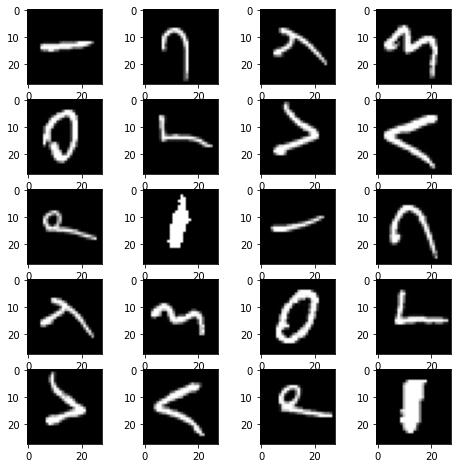

In [7]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = test_data_x.iloc[i].to_numpy().reshape((28,28))                         # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
plt.show()                                                                      # Finally shpwing the whole plot containing all the subplots

5- Now we define a function for us to preprocess the data,

We will start with reshaping the image to be with the size of 28x28, so that the training array will be of size of #imagesx28x28, then we will pass through each image to flip and rotate them as they are rotated, then we will reshape the entire array with the #imagex28x28x1, and the 1 stands for our grey scale images, lastly we will normalize our images by dividing by 255 for pixels normalization.

In [8]:
def preprocess_data(train_data_x):
  train_data_x = train_data_x.to_numpy().reshape((train_data_x.shape[0], 28, 28)).astype('uint8')
  for i in range(len(train_data_x)):
    train_data_x[i] = cv2.rotate(train_data_x[i], cv2.ROTATE_90_CLOCKWISE)      # Rotating the images.
    train_data_x[i] = np.flip(train_data_x[i], 1)                               # Flipping the images
  train_data_x = train_data_x.reshape([-1, 28, 28, 1]).astype('uint8')          # Reshaping into the required size.
  train_data_x = train_data_x.astype('float32')/255                             # Here we normalize our images.
  return np.asarray(train_data_x)

In [9]:
train_x = preprocess_data(train_data_x)                                         # Returns an array of dimensions (60000,28,28,1).
test_x = preprocess_data(test_data_x)                                           # Returns an array of dimensions (60000,28,28,1).

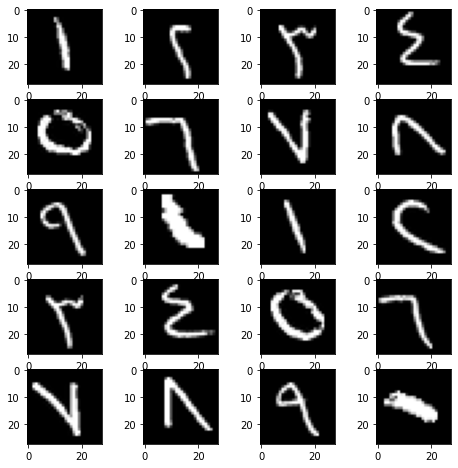

In [10]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = train_x[i]                     # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
plt.show()   

6- Now we preprocess our labels by converting them to the categorcal form.

In [11]:
train_y = to_categorical(train_data_y.values.astype('int32')                    # Returns an array of dimentions (13340, 28).
                         , num_classes=10)
test_y = to_categorical(test_data_y.values.astype('int32')                      # Returns an array of dimentions (3360, 28).
                        , num_classes=10)

7- We will now shuffle our training and test sets as we will get better results than using the data's classes in sequential form.

In [12]:
from sklearn.utils import shuffle                                               # Importing shuffle function from sklearn library.
train_x, train_y = shuffle(train_x, train_y)                                    # Now we shuffle x & y in the training set.
test_x, test_y, shuffle(test_x, test_y)                                         # Then x & y in our testing set.

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [13]:
print(train_x.shape)
print(train_y.shape)

(60000, 28, 28, 1)
(60000, 10)


## Building Model

8- We will now create our model's architecture, 

We will use keras for the creation of our model, we will start by creating a function for use to create our model, we will set the activation, optimizer and our initializing method as variables for us to easly modifiy it in the hyper-parameter tuning phase.

We will start by creating our first convolutional layer and setting up the input shape, we will create additional pooling layer along with a batch normalization layer, then we will add three convolutional layers with the same structure but the the double size of filters each layer.

Then we will flatten our layer preparing it for the fully connected layers, we will use a small neurons numbered layer with a drop out layer, batch normalization and we will add an L2 regularizer so we will control the overfitting.

In [14]:
def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation= 'softmax', kernel_initializer=kernel_initializer)
  ])

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [15]:
model = create_model()                                                          # Now we created an instance of a model with our custom architefture.
model.summary()                                                                 # Then we display our model's summary.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

Lets train our model.

In [16]:
model = create_model(optimizer='adam',                                       # We create our model with the specified hyper parameters
                     kernel_initializer='normal',
                     activation='relu')

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint                                     # We will import a call back to save the best epoch's weights

checkpointer = ModelCheckpoint(filepath='Saved Model Number\weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_x,                                                    
                    train_y, 
                    validation_split= 0.3,                                      # The model will split the data into 30% of validation.
                    epochs=10,                                                  # We will run the model for 30 epochs
                    batch_size=64,                                              # We will have a batch size of 64
                    callbacks=[checkpointer])                                   # Finally we will use the imported callback

Epoch 1/10
657/657 [==============================] - 11s 11ms/step - loss: 0.9286 - accuracy: 0.9104 - val_loss: 0.1001 - val_accuracy: 0.9896

Epoch 00001: val_loss improved from inf to 0.10009, saving model to Saved Model Number\weights.hdf5
Epoch 2/10
657/657 [==============================] - 7s 10ms/step - loss: 0.0888 - accuracy: 0.9889 - val_loss: 0.0656 - val_accuracy: 0.9925

Epoch 00002: val_loss improved from 0.10009 to 0.06561, saving model to Saved Model Number\weights.hdf5
Epoch 3/10
657/657 [==============================] - 7s 11ms/step - loss: 0.0701 - accuracy: 0.9910 - val_loss: 0.0859 - val_accuracy: 0.9874

Epoch 00003: val_loss did not improve from 0.06561
Epoch 4/10
657/657 [==============================] - 7s 11ms/step - loss: 0.0681 - accuracy: 0.9908 - val_loss: 0.0578 - val_accuracy: 0.9927

Epoch 00004: val_loss improved from 0.06561 to 0.05778, saving model to Saved Model Number\weights.hdf5
Epoch 5/10
657/657 [==============================] - 7s 10ms/st

11- Now lets load the best epoch's weights and then evaluate our model using the test set.

In [18]:
model.load_weights('Saved Model Number\weights.hdf5')                                              # Loading the best weights        
model.evaluate(test_x, test_y)                                                  # Evaluating our model

313/313 [==============================] - 1s 4ms/step - loss: 0.0651 - accuracy: 0.9902


[0.0651031956076622, 0.9901999831199646]

12- Lets plot our training journy to check the performance and verify that the model is not overfitting.

Text(0.5, 1.0, 'Training and validation loss')

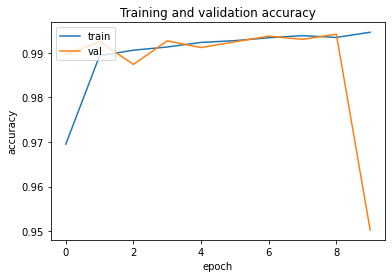

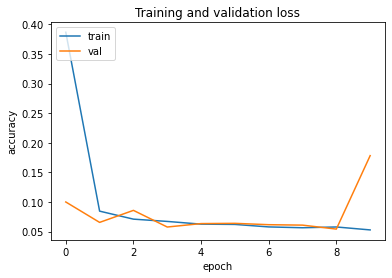

In [19]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.title('Training and validation loss')


12- Lets save our model for later use

In [21]:
model.save('Saved Model Number\\number.h5')

##Testing Model

Now lets load our model and test it on our custom images.

In [23]:
model = tf.keras.models.load_model('Saved Model Number\\number.h5')                      # Now we load the model

In the following function we mapped the categorical output with the Arabic letters to help us better identifing the classes.

In [24]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  return real_labels[categorical_label]

Finally lets test them on custom images.

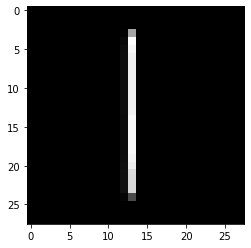

1


In [25]:
test = cv2.imread(r'D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\Dataset\Handmade dataset\2022_01_22_0mr_Kleki (1).png')
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
test = cv2.resize(test, (28, 28))
plt.imshow(test, cmap='gray')
plt.show()
test = np.reshape(test, (-1, 28, 28, 1))
test = test.astype('float32')/255
print(convert_categorical_label_to_real_label(np.argmax(model.predict(test))))

## Converting to tensorflow lite

In [29]:
#Create the label txt
real_labels = []
real_labels.extend([x for x in range(10)])
textfile = open(r"D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\label_number_only.txt", "w", encoding='utf-8')

for element in real_labels:
    textfile.write(str(element) + "\n")
textfile.close()

In [30]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\Saved Model Number\model_digit.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\IMAMLU~1\AppData\Local\Temp\tmpxa4qm2mf\assets


In [31]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [33]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\Saved Model Number\model_digit.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\label_number_only.txt"
_SAVE_TO_PATH = "D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Individual Model\Arabic Number Recognition\Saved Model Number\model_digit_with_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba